**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 5**
Preprocesamiento de datos

---

*   NOMBRE: Armando Cerda
*   MATRÍCULA: A01570376

In [1]:
!pip install scipy
!pip install scikit-learn


[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math 
import numpy as np 
import random
import seaborn as sns
from sklearn.impute import SimpleImputer
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', None)

In [3]:
def categorical_descriptive_stats_df(dataframe):    
    categorical_cols = dataframe.columns
    columns, modas, cardinalities, unique_vals, val_counts = [], [], [], [], []

    for col in categorical_cols:
        mode = dataframe[col].mode()[0]
        cardinality = dataframe[col].nunique()
        
        columns.append(col)
        modas.append(mode)
        cardinalities.append(cardinality)
        unique_vals.append("")
        val_counts.append("")
        
        value_counts = dataframe[col].value_counts().to_dict()
        for unique_val, count in value_counts.items():
            columns.append("")
            modas.append("")
            cardinalities.append("")
            unique_vals.append(unique_val)
            val_counts.append(count)
    
    stats_df = pd.DataFrame({
        'Column': columns,
        'Moda': modas,
        'Cardinalidad': cardinalities,
        'Unique Value': unique_vals,
        'Count': val_counts
    })
    
    return stats_df.style.hide()

def var_missing_vals(df, var_name):
    missing_values = df[var_name].isna().sum()
    total_values = len(df[var_name])    
    percentage_missing = (missing_values / total_values) * 100

    print(f"Número de valores faltantes en '{var_name}': {missing_values}")
    print(f"Porcentaje de valores faltantes en '{var_name}': {percentage_missing:.2f}%")
        

def classify_variable_distribution(df, var_name):
    value_pd = df[var_name].skew()
    value_math = df[var_name].values

    print(f"Value pandas: {value_pd} \nValue math: {python_skewness(value_math)} \nClasificación: {clasificar_asimetria(value_pd)}")    
    
def classify_and_visualize_variable(df, var_name):
    print(f"Variable: {var_name}")
    
    if df[var_name].dtype in ['int64', 'float64']:
        scale = 'Numerical'
        plt.figure(figsize=(8, 4))
        plt.hist(df[var_name].dropna(), bins=20, color='blue', alpha=0.7)
        plt.xlabel(var_name)
        plt.ylabel('Frequency')
        plt.title(f'Histogram of {var_name} in scale {scale}')
        plt.show()
    else:
        scale = 'Categorical'
        plt.figure(figsize=(8, 4))
        df[var_name].value_counts().plot(kind='bar', color='green', alpha=0.7)
        plt.xlabel(var_name)
        plt.ylabel('Frequency')
        plt.title(f'Bar Plot of {var_name} in scale {scale}')
        plt.show()
    
    return scale


def visualize_data(df, var_name, target_var):
    BM_MV = df[target_var].isna()
    # For numerical variables
    if np.issubdtype(df[var_name].dtype, np.number):
        # Box plot
        labels = ['Without Missing Values', 'With Missing Values']
        plt.boxplot([df[~BM_MV][var_name].dropna(), df[BM_MV][var_name].dropna()], vert=False, labels=labels)
        plt.xlabel(var_name)
        plt.title(f'Boxplot of {var_name}')
        plt.show()

        # Histogram
        plt.figure(figsize=(10, 4))
        
        plt.subplot(1, 2, 1)
        df[~BM_MV][var_name].hist(color='blue', alpha=0.7)
        plt.xlabel(var_name)
        plt.title(f'{var_name} Distribution (Without Missing Values)')
        
        plt.subplot(1, 2, 2)
        df[BM_MV][var_name].hist(color='red', alpha=0.7)
        plt.xlabel(var_name)
        plt.title(f'{var_name} Distribution (With Missing Values)')
        
        plt.tight_layout()
        plt.show()

    # For categorical variables
    else:
        plt.figure(figsize=(10, 4))
        
        plt.subplot(1, 2, 1)
        df[~BM_MV][var_name].value_counts().plot(kind='bar', color='blue', alpha=0.7)
        plt.xlabel(var_name)
        plt.ylabel('Frequency')
        plt.title(f'{var_name} Distribution (Without Missing Values)')
        
        plt.subplot(1, 2, 2)
        df[BM_MV][var_name].value_counts().plot(kind='bar', color='red', alpha=0.7)
        plt.xlabel(var_name)
        plt.ylabel('Frequency')
        plt.title(f'{var_name} Distribution (With Missing Values)')
        
        plt.tight_layout()
        plt.show()


def perform_statistical_tests(df, var_name, target_var):
    BM_MV = df[target_var].isna()

    # For numerical variables
    if np.issubdtype(df[var_name].dtype, np.number):
        group_1_data = df[BM_MV][var_name].dropna()
        group_2_data = df[~BM_MV][var_name].dropna()
        
        p_value = ttest_ind(group_1_data, group_2_data).pvalue
        print(f'p-value of t-test for {var_name}: {p_value}')

    # For categorical variables
    else:
        contingency_table = pd.crosstab(BM_MV, df[var_name])
        p_value = chi2_contingency(contingency_table)[1]
        print(f'p-value of Chi-squared test for {var_name}: {p_value}')


def clasificar_asimetria(valor):
    return "Simétrica" if math.isclose(valor, 0, abs_tol=1e-9) else ("Asimétrica positiva" if valor > 0 else "Asimétrica negativa")

def python_skewness(data):
    mean = np.nanmean(data)  
    std_dev = np.nanstd(data)
    return np.nanmean((data - mean)**3) / (std_dev**3)    

def impute_missing_values(df, var_name):
    values = df[var_name].values    
    skewness = np.mean((values - np.mean(values))**3) / (np.std(values)**3)
    
    Q1 = np.percentile(values, 25)
    Q3 = np.percentile(values, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    if abs(skewness) < 0.5 and not any(abs(values - np.median(values)) > 1.5 * IQR):
        imputation_strategy = 'mean'
    else:
        imputation_strategy = 'median'
    
    print(f"Imputation strategy for {var_name}: {imputation_strategy}")
    
    imputer = SimpleImputer(strategy=imputation_strategy)
    
    df[var_name] = imputer.fit_transform(df[[var_name]])
    
    return df    

In [4]:
df = pd.read_csv('responses.csv')
df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


1. Determina cuántas variables numéricas y cuántas de texto posee el conjunto de datos con el método `info()` y utiliza el método `describe()` del dataframe, para obtener el resumen de las estadísticas descriptivas. Separa el análisis según el tipo de datos (number, object).

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 150 entries, Music to House - block of flats
dtypes: float64(134), int64(5), object(11)
memory usage: 1.2+ MB


In [6]:
# ¿Cuántas columnas númericas hay?  
numeric_columns = df.select_dtypes(include=['int64', 'float64']).shape[1]
print("Número de columnas numéricas:", numeric_columns)

# ¿Cuántas columnas cualitativas hay?
qualitative_columns = df.select_dtypes(include=['object', 'category']).shape[1]
print("Número de columnas cualitativas:", qualitative_columns)

Número de columnas numéricas: 139
Número de columnas cualitativas: 11


In [7]:
# Tipo de datos numéricos
numeric_df  = df.select_dtypes(include=['int64', 'float64'])
numeric_df.describe()  

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
count,1007.000000,1008.000000,1006.000000,1005.000000,1005.000000,1003.000000,1008.000000,1007.000000,1004.000000,1007.000000,...,1008.000000,1008.000000,1007.000000,1007.000000,1010.000000,1008.00000,1003.000000,990.000000,990.000000,1004.000000
mean,4.731877,3.328373,3.113320,2.288557,2.123383,2.956132,2.761905,3.471698,3.761952,2.361470,...,3.234127,3.050595,3.201589,3.106256,2.870297,3.55754,20.433699,173.514141,66.405051,1.297809
std,0.664049,0.833931,1.170568,1.138916,1.076136,1.252570,1.260845,1.161400,1.184861,1.372995,...,1.323062,1.306321,1.188947,1.205368,1.284970,1.09375,2.828840,10.024505,13.839561,1.013348
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,15.000000,62.000000,41.000000,0.000000
25%,5.000000,3.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,19.000000,167.000000,55.000000,1.000000
50%,5.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,4.00000,20.000000,173.000000,64.000000,1.000000
75%,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,22.000000,180.000000,75.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,30.000000,203.000000,165.000000,10.000000


In [8]:
# Tipo de datos object
categoric_df = df.select_dtypes(include=['object', 'category'])
categorical_descriptive_stats_df(categoric_df)

Column,Moda,Cardinalidad,Unique Value,Count
Smoking,tried smoking,4,,
,,,tried smoking,430
,,,never smoked,208
,,,current smoker,189
,,,former smoker,175
Alcohol,social drinker,3,,
,,,social drinker,659
,,,drink a lot,222
,,,never,124
Punctuality,i am always on time,3,,


In [9]:
# Next will help me understand the data better

In [10]:
ex1, ex2, ex3 = random.sample(range(len(df)), 3)

print("Dataframe total rows: ", len(df))
df_info = pd.DataFrame(data=df.dtypes)
missing_values_total = df.notnull().sum() 
missing_values_percent = round((1 - missing_values_total / len(df)) * 100, 2).astype(str) + " %"

column_length = df.apply(len)  
unique_values_count = df.nunique() 

final_df = pd.concat([df_info[0].rename("Data Type"),
                      df.T[ex1].rename("Example 1"),
                      df.T[ex2].rename("Example 2"),
                      df.T[ex3].rename("Example 3"),
                      column_length.rename("Column Length"),                      
                      missing_values_total.rename("Total Not Missing"),
                      missing_values_percent.rename("% of missing values"),
                      unique_values_count.rename("Unique Values Count")], axis=1)
final_df

Dataframe total rows:  1010


,Data Type,Example 1,Example 2,Example 3,Column Length,Total Not Missing,% of missing values,Unique Values Count
Music,float64,5.0,4.0,5.0,1010,1007,0.3 %,5
Slow songs or fast songs,float64,3.0,3.0,NaN,1010,1008,0.2 %,5
Dance,float64,2.0,2.0,4.0,1010,1006,0.4 %,5
Folk,float64,3.0,2.0,2.0,1010,1005,0.5 %,5
Country,float64,4.0,1.0,4.0,1010,1005,0.5 %,5
Classical music,float64,5.0,2.0,4.0,1010,1003,0.69 %,5
Musical,float64,5.0,4.0,4.0,1010,1008,0.2 %,5
Pop,float64,1.0,4.0,5.0,1010,1007,0.3 %,5
Rock,float64,5.0,5.0,4.0,1010,1004,0.59 %,5
Metal or Hardrock,float64,5.0,5.0,3.0,1010,1007,0.3 %,5


2. Clasifique la variable `Weight` según su escala de medición. En función de ello elija el gráfico a generar (histograma / barras) y fundamente su elección.


Variable: Weight


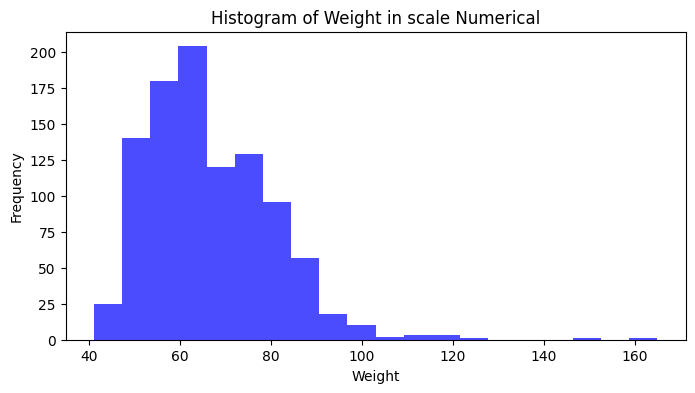

'Numerical'

In [11]:
#  la variable Weight es numérica (sigue la escala de razon, tiene orden donde 70 es mayor que 20, la diferencia es uniforme y hay un 0 absoluto). Esto significa,
#  que puedo usar un histograma para visualizar la distribución.

classify_and_visualize_variable(df, 'Weight')

3. Clasifique la distribución del peso según su asimetría, justificando tu respuesta. Incluye el cálculo numérico que lo demuestra.

In [12]:
classify_variable_distribution(df, 'Weight')
#  La clasificación es asimetrica positiva porque el valor de la asimetría es positivo., además de quee
# la visualización muestra una cola más larga en el lado derecho de la distribución.

Value pandas: 1.2237251927527477 
Value math: 1.2218702827632462 
Clasificación: Asimétrica positiva


4. ¿Cuántos valores faltantes tiene la variable `Weight`? ¿Qué porcentaje representa?


In [13]:
var_missing_vals(df, 'Weight')

Número de valores faltantes en 'Weight': 20
Porcentaje de valores faltantes en 'Weight': 1.98%


5. ¿Tendrán los valores faltantes de `Weight` relación con alguna otra variable? Analízalo considerando las siguientes columnas:
*   Numéricas: `Age, Number of siblings`
*   Categóricas: `Gender, Education`

Para ello deberás dividir cada columna en dos grupos: con/sin faltantes en `Weight` y utilizar métodos gráficos y la prueba t para ver si hay diferencias significativas.

**NOTA**. Puedes reutilizar las funciones `Diagnose_MV_Numerical` y `Diagnose_MV_Categorical` definidas en Hands-On-Prep_Missing_Values.zip. Revisa nuevamente cómo utilizarlas.

Analyzing variable: Age


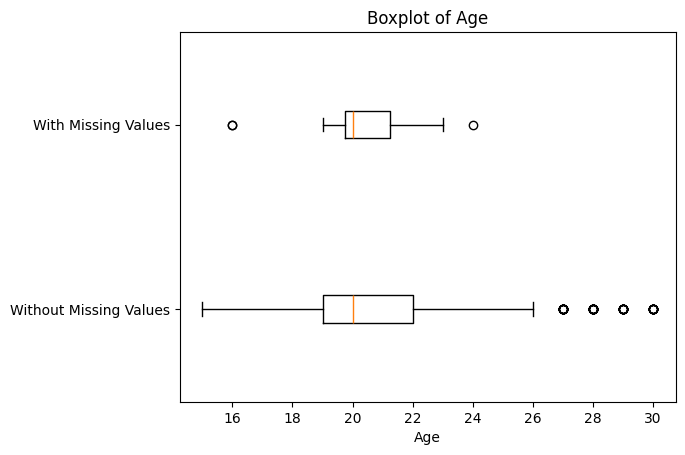

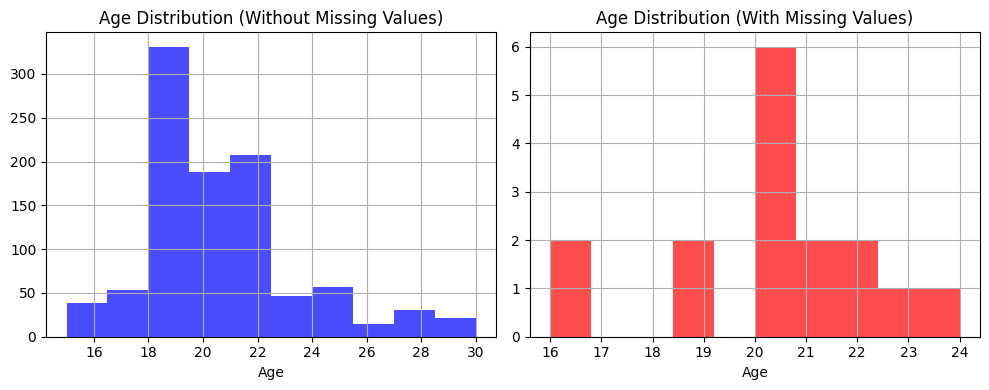

p-value of t-test for Age: 0.7258243979822129
Analyzing variable: Number of siblings


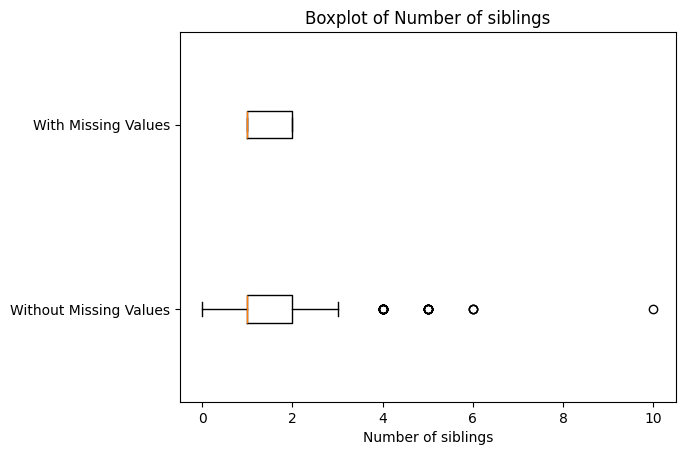

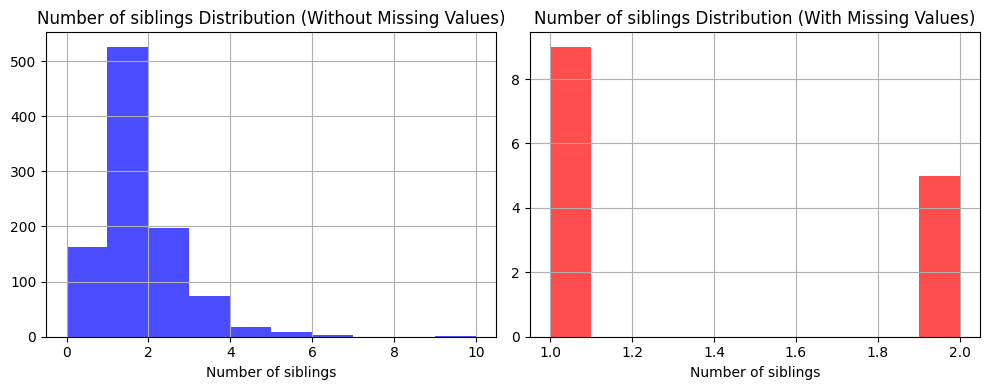

p-value of t-test for Number of siblings: 0.8255092107556896
Analyzing variable: Gender


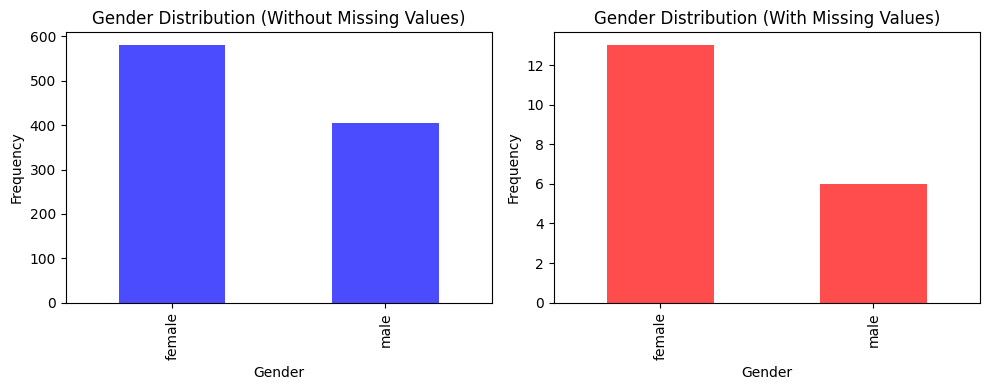

p-value of Chi-squared test for Gender: 0.5472167199163878
Analyzing variable: Education


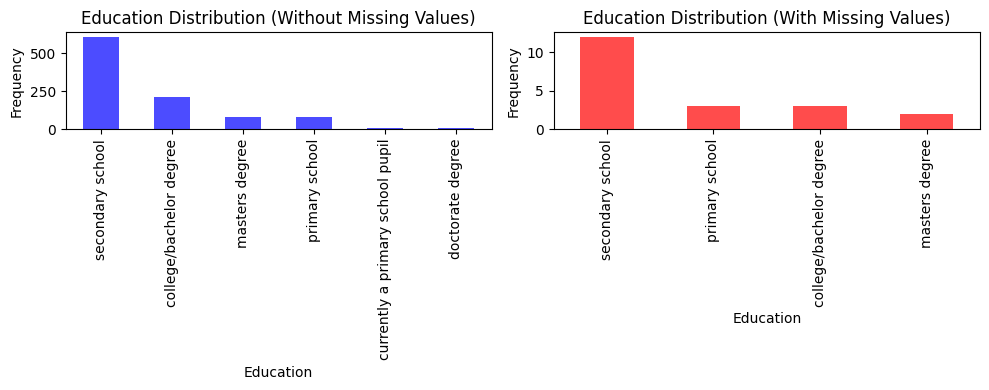

p-value of Chi-squared test for Education: 0.8424822989541867


In [14]:
for var in ['Age', 'Number of siblings', 'Gender', 'Education']:
    print(f"Analyzing variable: {var}")
    visualize_data(df, var, 'Weight')
    perform_statistical_tests(df, var, 'Weight')

6. Utiliza una medida de tendencia central para imputar los valores faltantes de `Weight`. ¿Cuál es recomendable y por qué?

In [15]:
df = impute_missing_values(df, 'Weight')

# Why ? Although the skewness would allow to use the mean, it has many outliers that would affect it.

Imputation strategy for Weight: median


7. ¿Hay valores atípicos de la variable `Weight`? Confírmalo con un gráfico de boxplot. ¿Cuántos son? Almacénalos en un dataframe independiente y elimínalos del conjunto original.

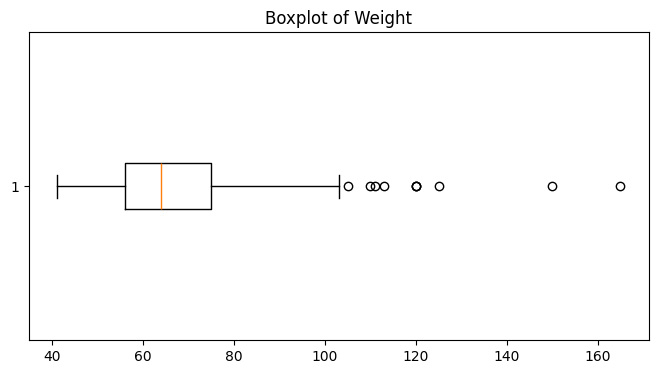

Valores atípicos en 'Weight':

Cantidad de valores atípicos en 'Weight': 10


,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
292,5.0,4.0,5.0,2.0,3.0,2.0,5.0,5.0,4.0,1.0,...,21.0,184.0,120.0,1.0,female,right handed,secondary school,no,city,house/bungalow
612,5.0,3.0,5.0,1.0,1.0,3.0,2.0,3.0,4.0,3.0,...,23.0,172.0,110.0,2.0,male,right handed,secondary school,no,village,block of flats
715,4.0,3.0,2.0,3.0,3.0,3.0,4.0,2.0,5.0,5.0,...,29.0,183.0,111.0,1.0,male,left handed,secondary school,no,village,house/bungalow
793,2.0,3.0,3.0,1.0,2.0,3.0,3.0,3.0,2.0,4.0,...,24.0,185.0,120.0,2.0,male,right handed,doctorate degree,no,city,house/bungalow
796,3.0,5.0,3.0,2.0,2.0,4.0,3.0,5.0,1.0,4.0,...,27.0,189.0,113.0,3.0,male,left handed,doctorate degree,no,city,house/bungalow


In [16]:
plt.figure(figsize=(8, 4))
plt.boxplot(df['Weight'], vert=False)
plt.title("Boxplot of Weight")
plt.show()

Q1 = np.percentile(df['Weight'], 25)
Q3 = np.percentile(df['Weight'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_df = df[(df['Weight'] < lower_bound) | (df['Weight'] > upper_bound)]
print("Valores atípicos en 'Weight':")

print("\nCantidad de valores atípicos en 'Weight':", len(outliers_df))
df = df[(df['Weight'] >= lower_bound) & (df['Weight'] <= upper_bound)]
outliers_df.head()

8. Repite el mismo proceso de valores atípicos con la variable `Height`.

Imputation strategy for Height: median


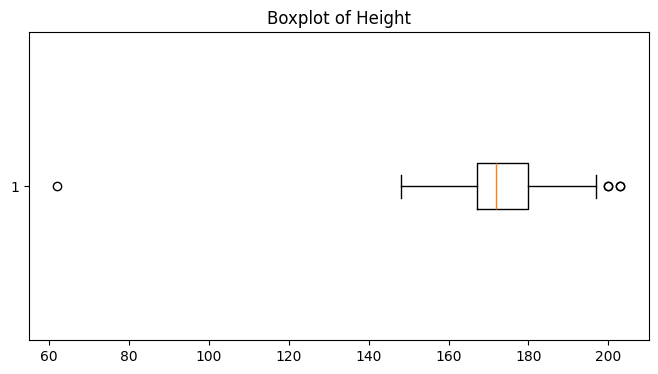

Valores atípicos en 'Height':

Cantidad de valores atípicos en 'Height': 5


,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
97,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,...,19.0,200.0,75.0,1.0,male,right handed,primary school,no,village,block of flats
220,5.0,3.0,4.0,3.0,3.0,4.0,2.0,1.0,3.0,1.0,...,18.0,200.0,90.0,2.0,male,right handed,secondary school,no,village,house/bungalow
547,5.0,4.0,1.0,4.0,2.0,5.0,3.0,1.0,4.0,5.0,...,21.0,203.0,80.0,2.0,male,left handed,secondary school,no,village,house/bungalow
676,5.0,4.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,...,20.0,62.0,55.0,2.0,female,right handed,college/bachelor degree,no,city,house/bungalow
799,5.0,3.0,1.0,2.0,3.0,4.0,5.0,2.0,4.0,5.0,...,18.0,203.0,89.0,2.0,male,right handed,secondary school,yes,city,block of flats


In [17]:
df = impute_missing_values(df, 'Height')


plt.figure(figsize=(8, 4))
plt.boxplot(df['Height'], vert=False)
plt.title("Boxplot of Height")
plt.show()

Q1 = np.percentile(df['Height'], 25)
Q3 = np.percentile(df['Height'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_df = df[(df['Height'] < lower_bound) | (df['Height'] > upper_bound)]
print("Valores atípicos en 'Height':")

print("\nCantidad de valores atípicos en 'Height':", len(outliers_df))
df = df[(df['Height'] >= lower_bound) & (df['Height'] <= upper_bound)]
outliers_df.head()

9. ¿Hay encuestados que sean atípicos según su índice de masa corporal (`BMI`)? El `BMI` puede ser calculado usando la siguiente fórmula:

`BMI = Weight / Height ^ 2`

**NOTA**. El peso tiene que estar en kilogramos y la altura en metros, pero en el conjunto la altura se ha registrado en centímetros, por lo que deberás convertirla a metros.

In [18]:
df.loc[:, 'Height'] = df['Height'] / 100
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

Imputation strategy for BMI: median


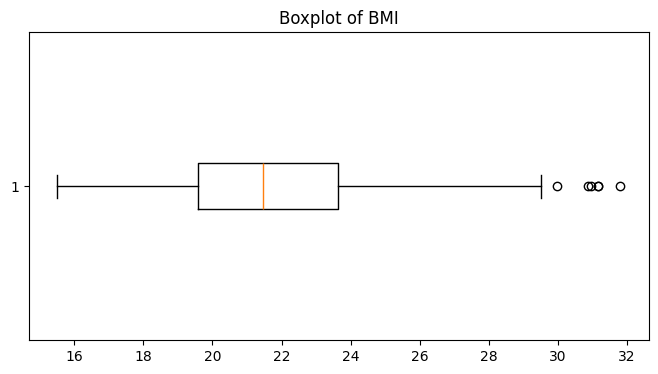

Valores atípicos en 'BMI':

Cantidad de valores atípicos en 'BMI': 6


,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats,BMI
42,5.0,5.0,2.0,2.0,2.0,3.0,4.0,5.0,5.0,4.0,...,1.70,90.0,0.0,female,right handed,secondary school,yes,city,block of flats,31.141869
151,5.0,4.0,3.0,1.0,1.0,3.0,2.0,2.0,4.0,4.0,...,1.80,100.0,1.0,male,right handed,secondary school,no,city,block of flats,30.864198
156,5.0,4.0,2.0,4.0,3.0,4.0,2.0,3.0,5.0,2.0,...,1.77,97.0,1.0,male,left handed,doctorate degree,yes,city,block of flats,30.961729
357,5.0,4.0,3.0,1.0,1.0,2.0,2.0,2.0,4.0,4.0,...,1.79,96.0,0.0,male,right handed,secondary school,yes,city,block of flats,29.961612
401,5.0,3.0,2.0,1.0,3.0,1.0,3.0,2.0,5.0,4.0,...,1.70,90.0,1.0,female,right handed,secondary school,no,village,block of flats,31.141869


In [19]:
df = impute_missing_values(df, 'BMI')


plt.figure(figsize=(8, 4))
plt.boxplot(df['BMI'], vert=False)
plt.title("Boxplot of BMI")
plt.show()

Q1 = np.percentile(df['BMI'], 25)
Q3 = np.percentile(df['BMI'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_df = df[(df['BMI'] < lower_bound) | (df['BMI'] > upper_bound)]
print("Valores atípicos en 'BMI':")

print("\nCantidad de valores atípicos en 'BMI':", len(outliers_df))
df = df[(df['BMI'] >= lower_bound) & (df['BMI'] <= upper_bound)]
outliers_df.head()

In [20]:
# Sí hay valores atípicos

10. Utiliza boxplots para visualizar la distribución del `BMI` según cada una de las variables categóricas de texto. Comenta un hallazgo que llame tu atención.

In [21]:
def analyze_bmi_by_categorical_variable(df, categorical_variable):
    plt.figure(figsize=(8, 4))
    df.boxplot(column='BMI', by=categorical_variable)
    plt.xticks(rotation=45)
    plt.show()

<Figure size 800x400 with 0 Axes>

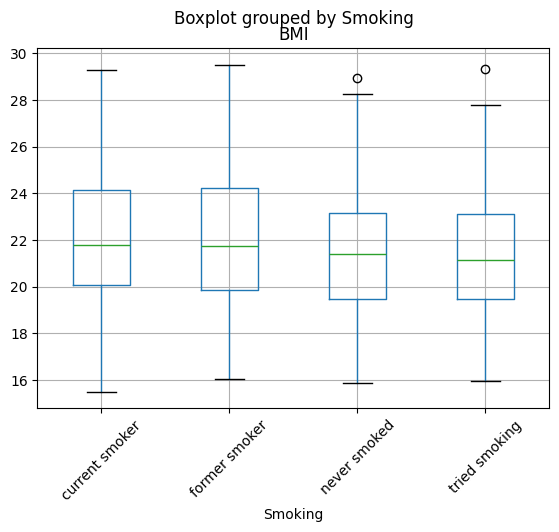

<Figure size 800x400 with 0 Axes>

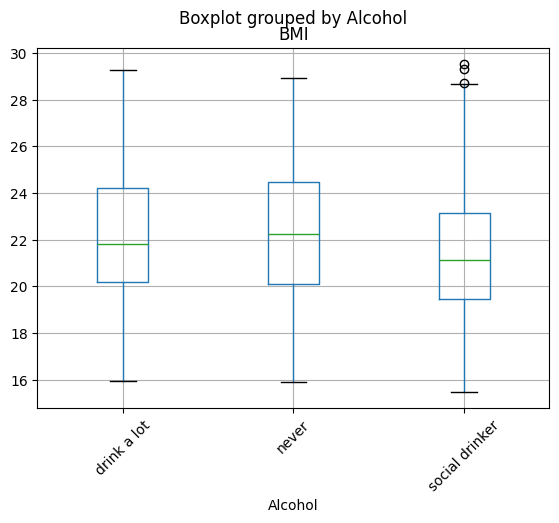

<Figure size 800x400 with 0 Axes>

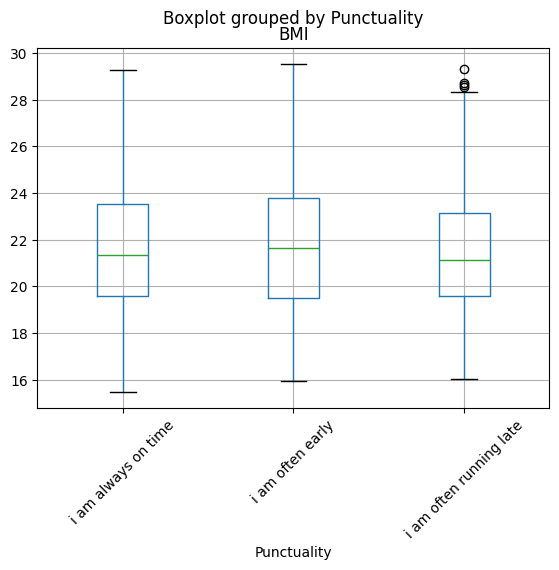

<Figure size 800x400 with 0 Axes>

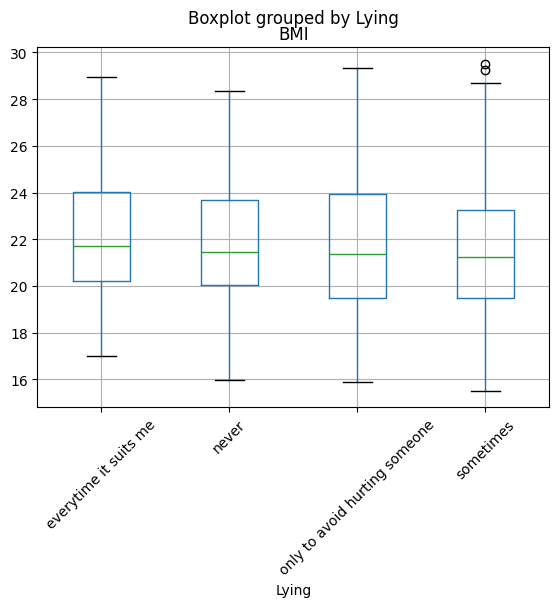

<Figure size 800x400 with 0 Axes>

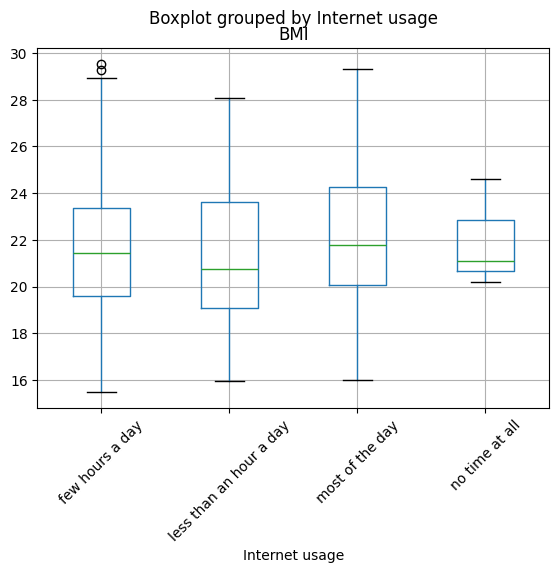

<Figure size 800x400 with 0 Axes>

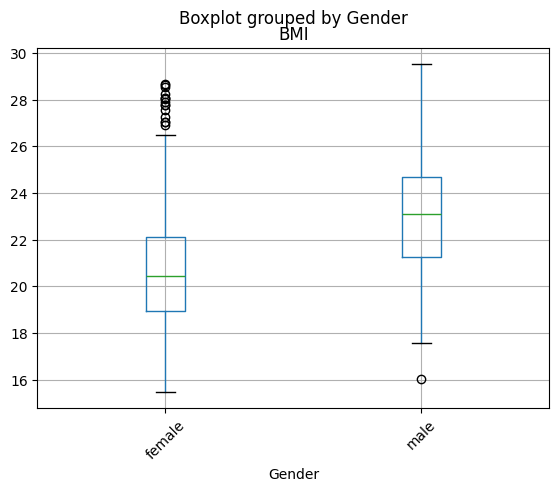

<Figure size 800x400 with 0 Axes>

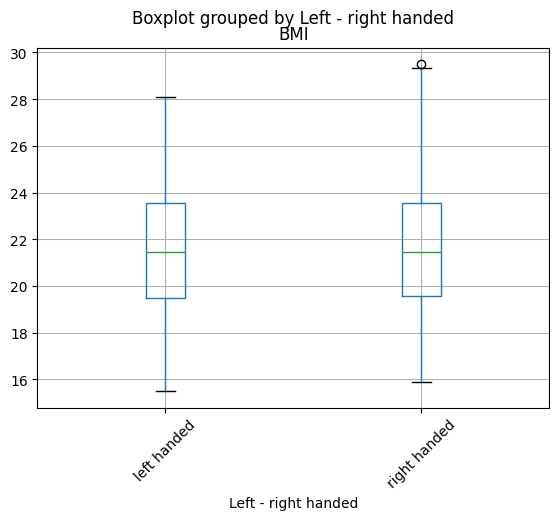

<Figure size 800x400 with 0 Axes>

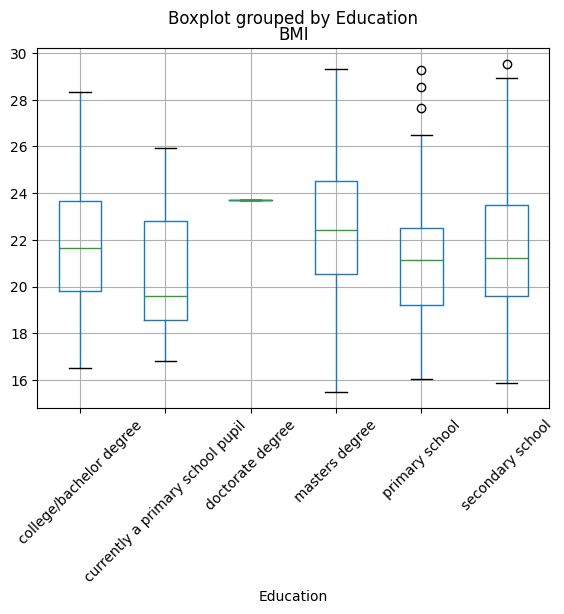

<Figure size 800x400 with 0 Axes>

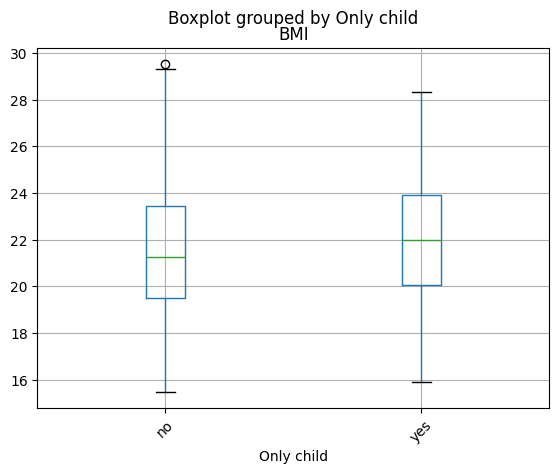

<Figure size 800x400 with 0 Axes>

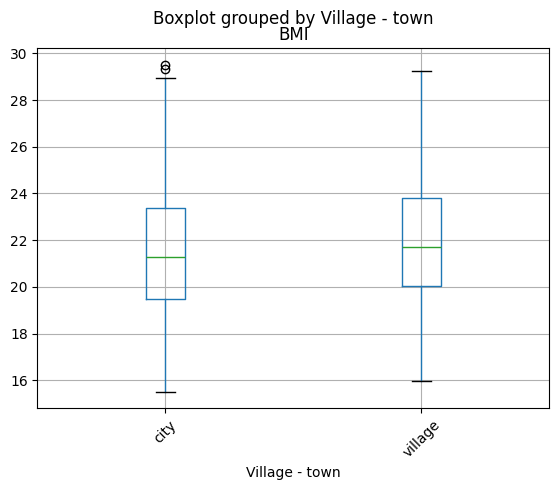

<Figure size 800x400 with 0 Axes>

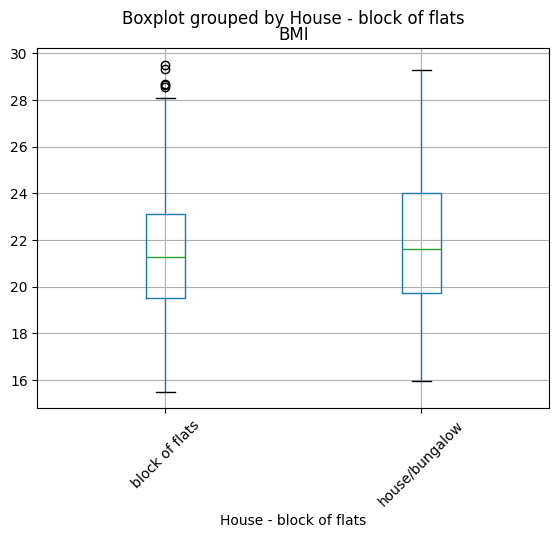

In [22]:
for var in categoric_df.columns:
    if var != 'BMI':
        analyze_bmi_by_categorical_variable(df, var)

In [23]:
#The male's median BMI is higher than women. The median of  BMI of people with doctorate is way higher than people with other Education.